In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
import math

# Общие функции-методы для построений регрессий
```
# def predict(X,a):
  '''
  Функция-метод для расчета значений Y по найденным коэффициентам для линейной и полномиальной регрессий
  Входные данные:
  X - массив предикатов, array
  a - оцененные коэффициенты, array
  Выходные данные: предсказанные значения Y, array
  '''
```
```
# def predict_exp(X,a):
  '''
  Функция-метод для расчета значений Y по найденным коэффициентам для экспоненциальной регрессии
  Входные данные:
  X - массив предикатов, array
  a - оцененные коэффициенты, array
  Выходные данные: предсказанные значения Y, array
  '''
```
```
# def error(X,Y,a):
  '''
  Функция-метод для расчета стандартной квадартичной ошибки регрессии
  Входные данные:
  X - массив предикатов, array
  Y - массив реальных значений зависимой перемнной, array
  a - оцененные коэффициенты, array
  Выходные данные: стандартная квадратичная ошибка, float
  '''
```
```
# def coef_lin_reg(X, Y, reg=0):
  '''
  Функция-метод для оценки коэффициентов регрессии
  Входные данные:
  X - массив предикатов, array
  Y - массив реальных значений зависимой перемнной, array
  reg - вид регуляризации, int
  Выходные данные: оцененные коэффициенты регресии, array

  '''
```

In [ ]:
def predict(X,a):
  return a.reshape(1,len(X[0])).dot(X.T).sum(axis=0)

In [ ]:
def predict_exp(X,a):
  return np.exp(a.reshape(1,len(X[0])).dot(X.T).sum(axis=0))

In [ ]:
def error(X, Y, a):    
  return sum((predict(X,a) - Y)**2) / (2 * len(X))

In [ ]:
def coef_lin_reg(X, Y, reg=0):
  reg=int(reg)
  if reg==0:
    a = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(Y.T)
  if reg==1:
    L1=math.fabs(np.mean(Y))
    alpha=10**(-2)
    step_h=500
    eps=10**(-3)
    while step_h==500:
      alpha=alpha*0.1
      step=0
      a=np.array([0.001]*len(X[0])).reshape(1,len(X[0]))
      J=1
      a_old=np.array([])
      while step<500 and J>eps:
        Y_count=predict(X,a)
        delta=Y_count-Y
        a_old=a
        a=a-alpha*(X.T.dot(delta)+L1*np.sign(a))
        J=np.linalg.norm(a-a_old)
        step+=1
      a=np.array(a[0])
      k=0
      for i in range(len(a)):
        if math.isinf(a[i])==False and math.isnan(a[i])==False:
          k+=1
      if math.isinf(J)==False:
        if k==len(a) and J<1:
          break
  if reg==2:
    L2=math.fabs(np.mean(Y))
    a=np.linalg.solve(L2*np.eye(len(X[0]))+X.T.dot(X),X.T.dot(Y))
  return a

# Функции-методы для линейной регрессии
```
# def generate_lin_reg(x,row):
  '''
  Функция-метод для генерации значений Х и Y линейной модели
  Входные данные:
  x - количество регрессоров, int
  row - колчиство наблюдений, int
  Выходные данные: сгенерированный массив Х и Y, array
  '''
```
```
# def output_lin_reg(X,X_,Y,reg=0,graph=0):
  '''
  Функция-метод для оценки коэффициентов, вывода итогов регресии и построения графика, если был указан соотвествующий параметр
  Входные данные:
  X - массив предикатов, array
  X_ - массив предикатов с добавленной 1 для свободного члена, array
  Y - массив реальных значений зависимой перемнной, array
  reg - вид регуляризации, int
  graph - построение графика, int
  Выходные данные: уравнение регрессии и сведения о коэффициентах, график, если был указан соответсвующий параметр
  '''
```
```
# def input_lin_reg():
  '''
  Функция-метод для ввода параметров генерации данных для линейной регресии
  Выходные данные: список введенных параметров, list
  '''
```
```
# def all_f_lin_reg():
  '''
  Функция-метод для объединения работы всех функций
  '''
```


In [ ]:
def generate_lin_reg(x,row):
  x=int(x)
  row=int(row)
  X = np.random.random((row,x))
  X_dop = np.random.randint(1,100,size=(1,x))
  for i in range(row):
    X[i]=X[i]*X_dop
  X_ = np.hstack([np.array([1]*len(X)).reshape(len(X),1), X])
  a = [1]
  for i in range(x):
    a.append(np.random.randint(-100,100)*np.random.random())
  s=math.fabs(sum(X_[0]*a))
  noise = np.random.randint(-s-100,s+100,size=(row,1))
  Y=[]
  for i in range(row):
    Y.append(sum(X_[i]*a)+noise[i])
  return X,np.array(X_),np.array(Y).reshape(1,row)[0]

In [ ]:
def output_lin_reg(X,X_,Y,reg=0,graph=0):
  a=coef_lin_reg(X_, Y, reg)
  x_list=[]
  y=round(a[0],5)
  for i in range(len(X_[0])-1):
    x_list.append(f'x{i}')
  for i in range(len(x_list)):
    x_list[i]=Symbol(x_list[i])
    y=y+x_list[i]*round(a[i+1],5)
  a=list(map(lambda x:round(x,5),a))
  print('Коэффициенты независимых преременных',dict(zip(x_list,a[1:])))
  print('Свободный член регрессии:',round(a[0],5))
  print('Уравнение регрессии:',y)
  print('Стандартная квадратичная ошибка:',error(X_,Y,np.array(a)))
  if int(graph)==1 and len(a)==2:
    plt.figure(figsize=(15,7))
    plt.scatter(X,Y,label='данные')
    plt.plot(X,predict(X_,np.array(a)),color='red',label='Линия регрессии')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('График данных и оцененная линейная регрессия')

In [ ]:
def input_lin_reg():
  x=input('Введите количество регрессоров. Пример: 2. Ввод: ')
  row=input('Введите количество наблюдений. Пример: 100. Ввод: ')
  h=input('Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:')
  if int(h)==1:
    print('Введите вид регуляризации')
    print('0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация')
    reg=input('Пример: 2. Ввод:')
    graph=input('Хотите ли выполнить построение графика (доступно только для парной линейной регрессии)? 1-Да/0-Нет. Ввод:')
  if int(h)==1:
    return [x,row,reg,graph]
  else:
    return [x,row]

In [ ]:
def all_f_lin_reg():
  s=input_lin_reg()
  g=generate_lin_reg(s[0],s[1])
  if len(s)==2:
    output_lin_reg(*g)
  else:
    output_lin_reg(*g,s[2],s[3])

# Примеры сгенерированных данных + линейная регрессия

In [ ]:
all_f_lin_reg()

Введите количество регрессоров. Пример: 2. Ввод: 1
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:0
Коэффициенты независимых преременных {x0: 96.23576}
Свободный член регрессии: -225.22216
Уравнение регрессии: 96.23576*x0 - 225.22216
Стандартная квадратичная ошибка: 537181.2184073122


In [ ]:
all_f_lin_reg()

Введите количество регрессоров. Пример: 2. Ввод: 4
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:0
Коэффициенты независимых преременных {x0: 9.75392, x1: 24.80825, x2: 74.29834, x3: -35.07247}
Свободный член регрессии: -24.04429
Уравнение регрессии: 9.75392*x0 + 24.80825*x1 + 74.29834*x2 - 35.07247*x3 - 24.04429
Стандартная квадратичная ошибка: 113092.93931771215


In [ ]:
all_f_lin_reg()

Введите количество регрессоров. Пример: 2. Ввод: 3
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:0
Коэффициенты независимых преременных {x0: 21.2069, x1: -10.19024, x2: -27.00405}
Свободный член регрессии: 15.53587
Уравнение регрессии: 21.2069*x0 - 10.19024*x1 - 27.00405*x2 + 15.53587
Стандартная квадратичная ошибка: 81435.77819993299


Введите количество регрессоров. Пример: 2. Ввод: 1
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:0
Хотите ли выполнить построение графика (доступно только для парной линейной регрессии)? 1-Да/0-Нет. Ввод:1
Коэффициенты независимых преременных {x0: -3.49814}
Свободный член регрессии: -3.1216
Уравнение регрессии: -3.49814*x0 - 3.1216
Стандартная квадратичная ошибка: 2997.1259818677167


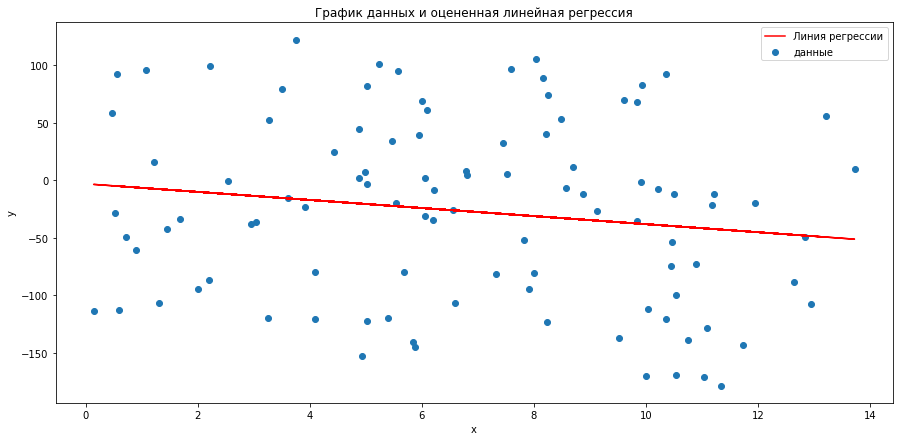

In [ ]:
all_f_lin_reg()

Введите количество регрессоров. Пример: 2. Ввод: 1
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:1
Хотите ли выполнить построение графика (доступно только для парной линейной регрессии)? 1-Да/0-Нет. Ввод:1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


Коэффициенты независимых преременных {x0: 31.57161}
Свободный член регрессии: 2.08632
Уравнение регрессии: 31.57161*x0 + 2.08632
Стандартная квадратичная ошибка: 19942.912228243124


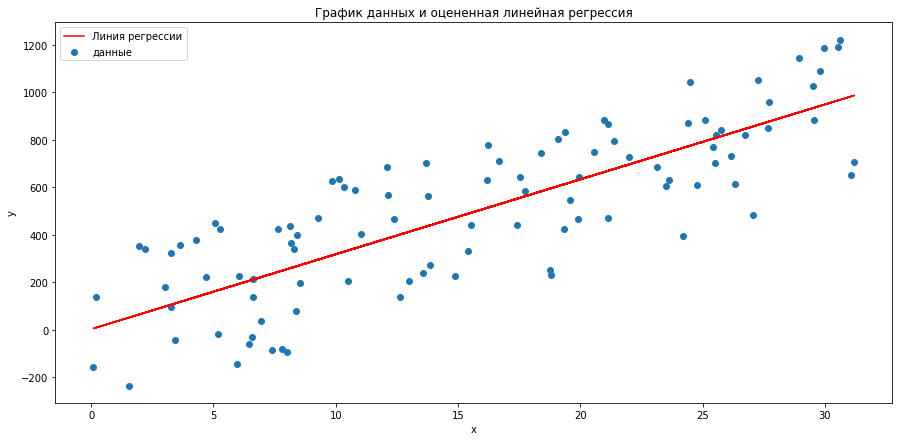

In [ ]:
all_f_lin_reg()

Введите количество регрессоров. Пример: 2. Ввод: 1
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:2
Хотите ли выполнить построение графика (доступно только для парной линейной регрессии)? 1-Да/0-Нет. Ввод:1
Коэффициенты независимых преременных {x0: 11.32471}
Свободный член регрессии: -0.00961
Уравнение регрессии: 11.32471*x0 - 0.00961
Стандартная квадратичная ошибка: 1716.885001259584


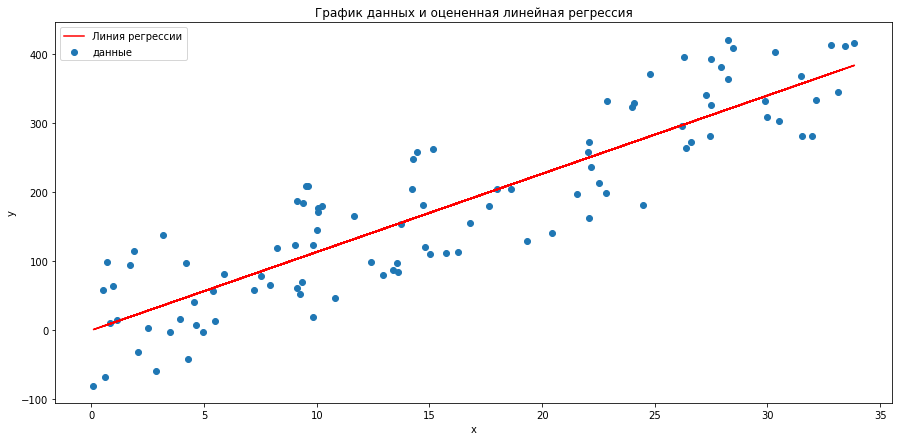

In [ ]:
all_f_lin_reg()

# Функции-методы для полномиальной регрессии
```
# def generate_pol_reg(x,row):
  '''
  Функция-метод для генерации значений Х и Y полиномиальной модели
  Входные данные:
  row - колчиство наблюдений, int
  degree - степень полинома, int
  Выходные данные: сгенерированный массив Х и Y, array
  '''
```
```
# def output_pol_reg(X,X_,Y,reg=0,graph=0):
  '''
  Функция-метод для оценки коэффициентов, вывода итогов регресии и построения графика, если был указан соотвествующий параметр
  Входные данные:
  X - массив предикатов, array
  X_ - массив предикатов с добавленной 1 для свободного члена, array
  Y - массив реальных значений зависимой перемнной, array
  reg - вид регуляризации, int
  graph - построение графика, int
  Выходные данные: уравнение регрессии и сведения о коэффициентах, график, если был указан соответсвующий параметр
  '''
```
```
# def input_pol_reg():
  '''
  Функция-метод для ввода параметров генерации данных для полиномиальной регресии
  Выходные данные: список введенных параметров, list
  '''
```
```
# def all_f_pol_reg():
  '''
  Функция-метод для объединения работы всех функций
  '''
```

In [ ]:
def generate_pol_reg(degree,row):
  row=int(row)
  degree=int(degree)
  X = np.random.random((row,1))
  X_dop = np.random.randint(1,100)
  for i in range(row):
    X[i]=X[i]*X_dop
  X_ = np.hstack([np.array([1]*len(X)).reshape(len(X),1), X])
  for j in range(degree-1):
    X_ = np.hstack([X_,X**(j+2)])
  a = [1]
  for i in range(len(X_[0])-1):
    a.append(np.random.randint(-10,10)*np.random.random())
  s=math.fabs(sum(X_[0]*a))
  noise = np.random.randint(-s-100,s+100,size=(row,1))
  Y=[]
  for i in range(row):
    Y.append(sum(X_[i]*a)+noise[i])
  return X,np.array(X_),np.array(Y).reshape(1,row)[0]

In [ ]:
def output_pol_reg(X,X_,Y,reg=0,graph=0):
  a=coef_lin_reg(X_, Y, reg)
  x_list=[]
  y=round(a[0],5)
  for i in range(len(X_[0])-1):
    x_list.append(f'x**{i+1}')
  for i in range(len(x_list)):
    x_list[i]=Symbol(x_list[i])
    y=y+x_list[i]*round(a[i+1],5)
  a=list(map(lambda x:round(x,5),a))
  print('Коэффициенты независимых преременных',dict(zip(x_list,a[1:])))
  print('Свободный член регрессии:',round(a[0],5))
  print('Уравнение регрессии:',y)
  print('Стандартная квадратичная ошибка:',error(X_,Y,np.array(a)))
  if int(graph)==1:
    plt.figure(figsize=(15,7))
    plt.scatter(X,Y,label='данные')
    X_sort=X_[X_[:, 1].argsort()]
    plt.plot(X_sort[:,1],predict(X_sort,np.array(a)),color='red',label='Линия регрессии')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('График данных и оцененная полиномиальная регрессия')

In [ ]:
def input_pol_reg():
  row=input('Введите количество наблюдений. Пример: 100. Ввод: ')
  degree=input('Введите степень полинома. Пример: 2. Ввод: ')
  h=input('Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:')
  if int(h)==1:
    print('Введите вид регуляризации')
    print('0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация')
    reg=input('Пример: 2. Ввод:')
    graph=input('Хотите ли выполнить построение графика? 1-Да/0-Нет. Ввод:')
  if int(h)==1:
    return [row,degree,reg,graph]
  else:
    return [row,degree]

In [ ]:
def all_f_pol_reg():
  s=input_pol_reg()
  g=generate_pol_reg(s[1],s[0])
  if len(s)==2:
    output_pol_reg(*g)
  else:
    output_pol_reg(*g,s[2],s[3])

# Примеры сгенерированных данных + полиномиальная регресиия

In [ ]:
all_f_pol_reg()

Введите количество наблюдений. Пример: 100. Ввод: 100
Введите степень полинома. Пример: 2. Ввод: 2
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:0
Коэффициенты независимых преременных {x**1: -89.04457, x**2: -1.98763}
Свободный член регрессии: 1615.70319
Уравнение регрессии: -89.04457*x**1 - 1.98763*x**2 + 1615.70319
Стандартная квадратичная ошибка: 46806970.003836006


In [ ]:
all_f_pol_reg()

Введите количество наблюдений. Пример: 100. Ввод: 100
Введите степень полинома. Пример: 2. Ввод: 4
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:0
Коэффициенты независимых преременных {x**1: 300.46523, x**2: -64.49432, x**3: 7.59172, x**4: -0.39331}
Свободный член регрессии: -464.28425
Уравнение регрессии: 300.46523*x**1 - 64.49432*x**2 + 7.59172*x**3 - 0.39331*x**4 - 464.28425
Стандартная квадратичная ошибка: 872118.6181941745


Введите количество наблюдений. Пример: 100. Ввод: 100
Введите степень полинома. Пример: 2. Ввод: 2
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:0
Хотите ли выполнить построение графика? 1-Да/0-Нет. Ввод:1
Коэффициенты независимых преременных {x**1: 13.71142, x**2: -6.32603}
Свободный член регрессии: -2.90366
Уравнение регрессии: 13.71142*x**1 - 6.32603*x**2 - 2.90366
Стандартная квадратичная ошибка: 1603.8787141627442


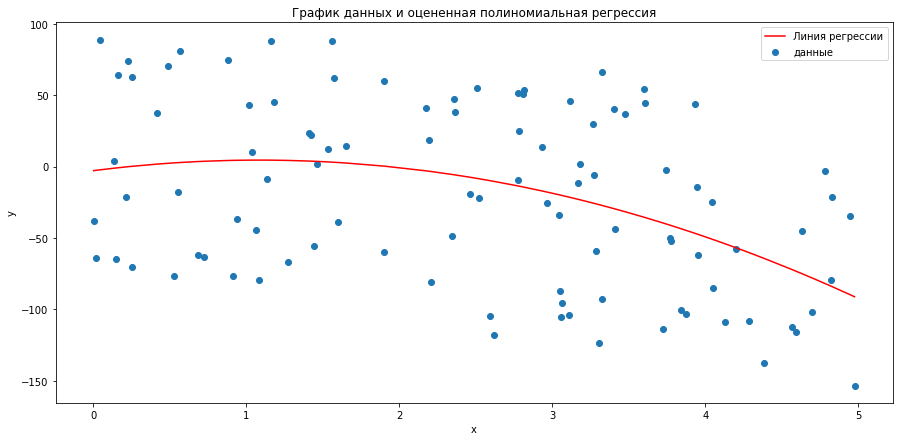

In [ ]:
all_f_pol_reg()

Введите количество наблюдений. Пример: 100. Ввод: 100
Введите степень полинома. Пример: 2. Ввод: 3
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:0
Хотите ли выполнить построение графика? 1-Да/0-Нет. Ввод:1
Коэффициенты независимых преременных {x**1: 20402.21689, x**2: -744.36984, x**3: 9.28289}
Свободный член регрессии: -134764.08186
Уравнение регрессии: 20402.21689*x**1 - 744.36984*x**2 + 9.28289*x**3 - 134764.08186
Стандартная квадратичная ошибка: 10996090559.858496


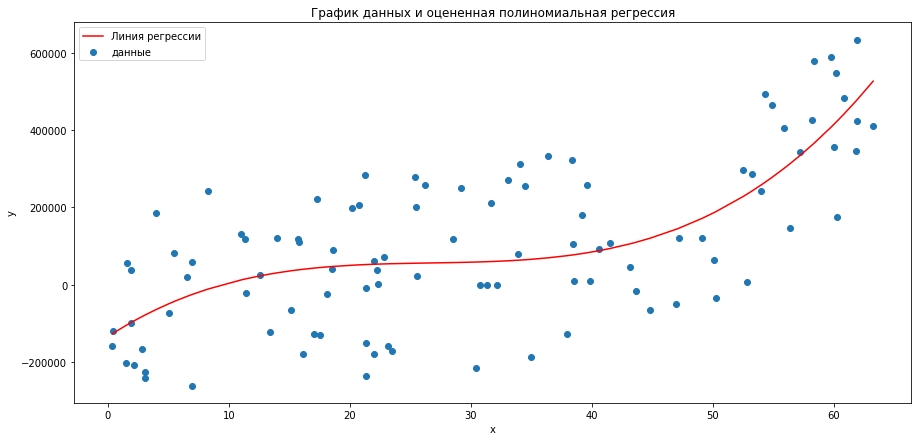

In [ ]:
all_f_pol_reg()

Введите количество наблюдений. Пример: 100. Ввод: 100
Введите степень полинома. Пример: 2. Ввод: 2
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:1
Хотите ли выполнить построение графика? 1-Да/0-Нет. Ввод:1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


Коэффициенты независимых преременных {x**1: 0.07324, x**2: 4.35493}
Свободный член регрессии: 0.0022
Уравнение регрессии: 0.07324*x**1 + 4.35493*x**2 + 0.0022
Стандартная квадратичная ошибка: 204194.5173452908


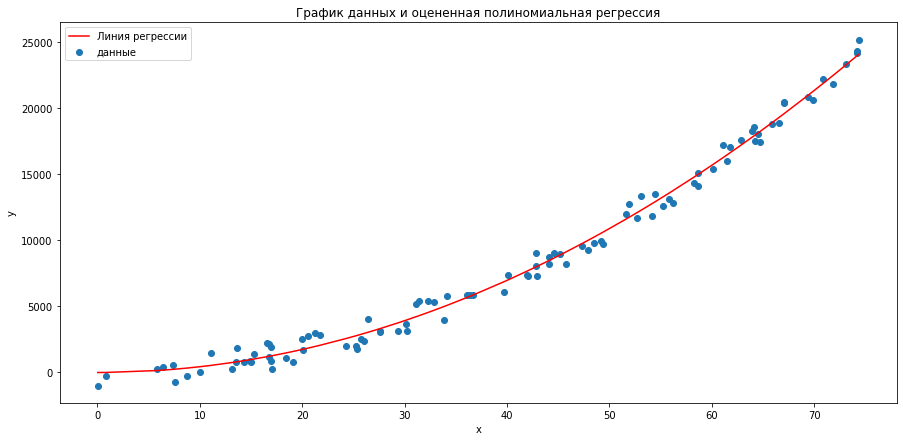

In [ ]:
all_f_pol_reg()

Введите количество наблюдений. Пример: 100. Ввод: 100
Введите степень полинома. Пример: 2. Ввод: 2
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:2
Хотите ли выполнить построение графика? 1-Да/0-Нет. Ввод:1
Коэффициенты независимых преременных {x**1: -2.35856, x**2: 1.60937}
Свободный член регрессии: -0.1781
Уравнение регрессии: -2.35856*x**1 + 1.60937*x**2 - 0.1781
Стандартная квадратичная ошибка: 46894.39471036984


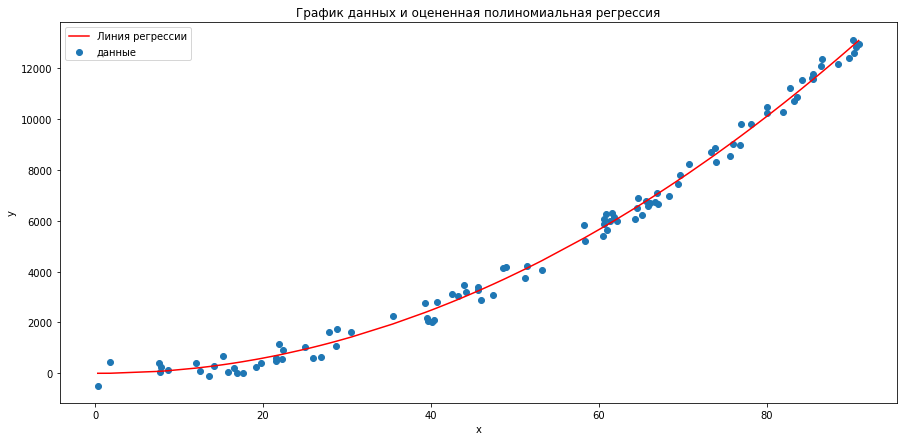

In [ ]:
all_f_pol_reg()

Введите количество наблюдений. Пример: 100. Ввод: 100
Введите степень полинома. Пример: 2. Ввод: 3
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:2
Хотите ли выполнить построение графика? 1-Да/0-Нет. Ввод:1
Коэффициенты независимых преременных {x**1: 0.12776, x**2: 1.12654, x**3: -0.13656}
Свободный член регрессии: 0.00146
Уравнение регрессии: 0.12776*x**1 + 1.12654*x**2 - 0.13656*x**3 + 0.00146
Стандартная квадратичная ошибка: 2227.4022722158406


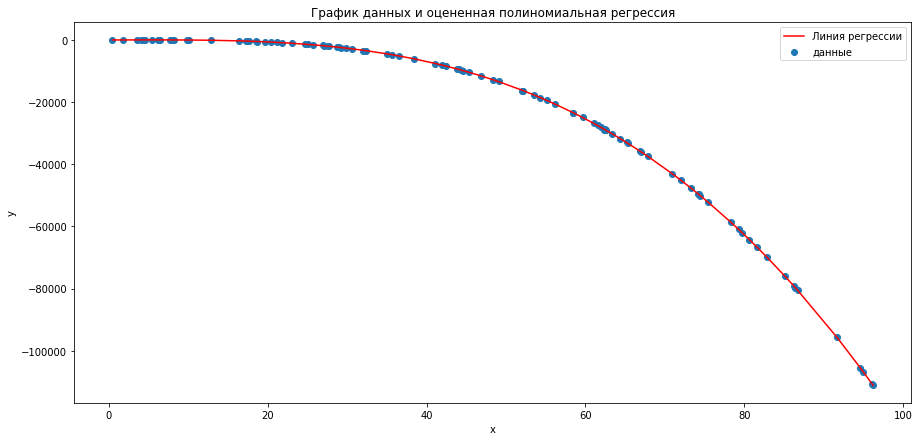

In [ ]:
all_f_pol_reg()

# Функции-методы для экспоненциальной регрессии
```
# def generate_exp_reg(x,row):
  '''
  Функция-метод для генерации значений Х и Y экспоненциальной модели
  Входные данные:
  row - колчиство наблюдений, int
  degree - степень полинома, int
  Выходные данные: сгенерированный массив Х и Y, array
  '''
```
```
# def output_exp_reg(X,X_,Y,reg=0,graph=0):
  '''
  Функция-метод для оценки коэффициентов, вывода итогов регресии и построения графика, если был указан соотвествующий параметр
  Входные данные:
  X - массив предикатов, array
  X_ - массив предикатов с добавленной 1 для свободного члена, array
  Y - массив реальных значений зависимой перемнной, array
  reg - вид регуляризации, int
  graph - построение графика, int
  Выходные данные: уравнение регрессии и сведения о коэффициентах, график, если был указан соответсвующий параметр
  '''
```
```
# def input_exp_reg():
  '''
  Функция-метод для ввода параметров генерации данных для экспоненциальной регресии
  Выходные данные: список введенных параметров, list
  '''
```
```
# def all_f_exp_reg():
  '''
  Функция-метод для объединения работы всех функций
  '''
```

In [ ]:
def generate_exp_reg(x,row):
  x=int(x)
  row=int(row)
  X = np.random.random((row,x))
  X_dop = np.random.randint(1,10,size=(1,x))
  for i in range(row):
    X[i]=X[i]*X_dop
  X_ = np.hstack([np.array([1]*len(X)).reshape(len(X),1), X])
  a = [1]
  for i in range(x):
    a.append(np.random.randint(-2,2)*np.random.random())
  s=np.exp(sum(X_[i]*a))+1
  Y=[]
  for i in range(row):
    noise=np.random.random()*np.random.randint(-1,1)
    if math.exp(sum(X_[i]*a))+noise>0:
      Y.append(float(math.exp(sum(X_[i]*a))+noise))
    else:
      Y.append(float(math.exp(sum(X_[i]*a))+math.fabs(noise)))
  return X,np.array(X_),np.array(Y).reshape(1,row)[0]

In [ ]:
def output_exp_reg(X,X_,Y,reg=0,graph=0):
  a=coef_lin_reg(X_, np.log(Y), reg)
  x_list=[]
  y=round(a[0],5)
  for i in range(len(X_[0])-1):
    x_list.append(f'x{i}')
  for i in range(len(x_list)):
    x_list[i]=Symbol(x_list[i])
    y=y+x_list[i]*round(a[i+1],5)
  a=list(map(lambda x:round(x,5),a))
  print('Коэффициенты независимых преременных',dict(zip(x_list,a[1:])))
  print('Свободный член регрессии:',round(a[0],5))
  print('Уравнение регрессии:',exp(y))
  print('Стандартная квадратичная ошибка:',error(X_,np.log(Y),np.array(a)))
  if int(graph)==1:
    plt.figure(figsize=(15,7))
    plt.scatter(X,Y,label='данные')
    X_sort=X_[X_[:, 1].argsort()]
    plt.plot(X_sort[:,1],predict_exp(X_sort,np.array(a)),color='red',label='Линия регрессии')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('График данных и оцененная экспоненциальная регрессия')

In [ ]:
def input_exp_reg():
  x=input('Введите количество регрессоров. Пример: 2. Ввод:')
  row=input('Введите количество наблюдений. Пример: 100. Ввод: ')
  h=input('Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:')
  if int(h)==1:
    print('Введите вид регуляризации')
    print('0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация')
    reg=input('Пример: 2. Ввод:')
    graph=input('Хотите ли выполнить построение графика(доступно только для одного регрессора)? 1-Да/0-Нет. Ввод:')
  if int(h)==1:
    return [x,row,reg,graph]
  else:
    return [x,row]

In [ ]:
def all_f_exp_reg():
  s=input_exp_reg()
  g=generate_exp_reg(s[0],s[1])
  if len(s)==2:
    output_exp_reg(*g)
  else:
    output_exp_reg(*g,s[2],s[3])

# Примеры генераций данных + экспоненциальная регрессия


In [ ]:
all_f_exp_reg()

Введите количество регрессоров. Пример: 2. Ввод:1
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:0
Коэффициенты независимых преременных {x0: -0.0185}
Свободный член регрессии: 0.90105
Уравнение регрессии: 2.46218705075455*exp(-0.0185*x0)
Стандартная квадратичная ошибка: 0.010798287545033581


In [ ]:
all_f_exp_reg()

Введите количество регрессоров. Пример: 2. Ввод:3
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:0
Коэффициенты независимых преременных {x0: 0.03224, x1: -0.52058, x2: 0.00703}
Свободный член регрессии: 0.80581
Уравнение регрессии: 2.23850895693047*exp(0.03224*x0 - 0.52058*x1 + 0.00703*x2)
Стандартная квадратичная ошибка: 0.019618040160026835


Введите количество регрессоров. Пример: 2. Ввод:1
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:0
Хотите ли выполнить построение графика(доступно только для одного регрессора)? 1-Да/0-Нет. Ввод:1
Коэффициенты независимых преременных {x0: 0.69645}
Свободный член регрессии: 0.86205
Уравнение регрессии: 2.36801014211419*exp(0.69645*x0)
Стандартная квадратичная ошибка: 0.005433415322663826


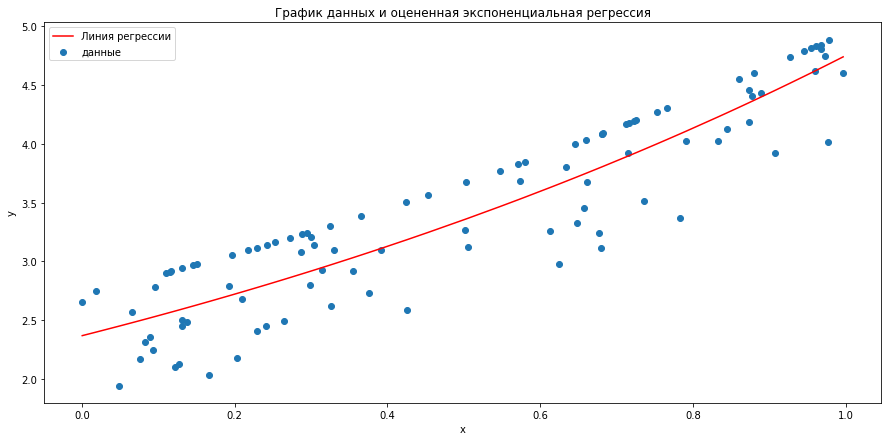

In [ ]:
all_f_exp_reg()

Введите количество регрессоров. Пример: 2. Ввод:1
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:1
Хотите ли выполнить построение графика(доступно только для одного регрессора)? 1-Да/0-Нет. Ввод:1
Коэффициенты независимых преременных {x0: -0.49675}
Свободный член регрессии: -0.30384
Уравнение регрессии: 0.737978933634346*exp(-0.49675*x0)
Стандартная квадратичная ошибка: 2.5291618667300217


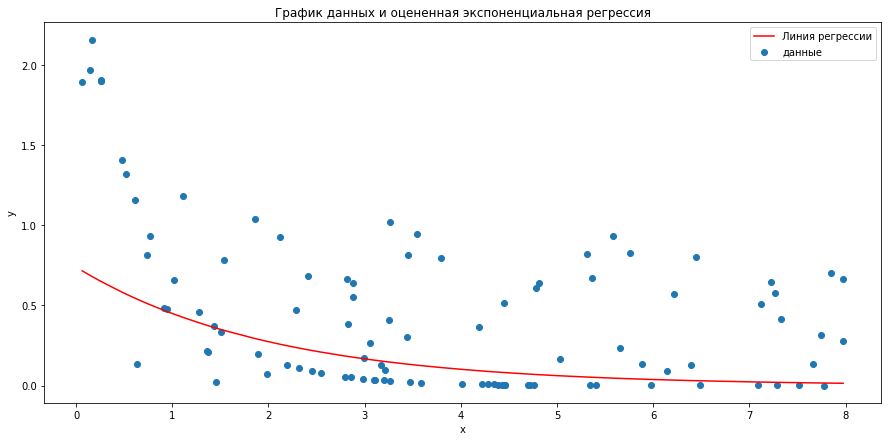

In [ ]:
all_f_exp_reg()

Введите количество регрессоров. Пример: 2. Ввод:1
Введите количество наблюдений. Пример: 100. Ввод: 100
Хотите ввести дополнительные параметры? 1-Да/0-Нет. Если нет, будут взяты параметры по умолчанию. Ввод:1
Введите вид регуляризации
0 - без регуляризации, 1 - L1-регуляризация, 2 - L2-регуляризация
Пример: 2. Ввод:2
Хотите ли выполнить построение графика(доступно только для одного регрессора)? 1-Да/0-Нет. Ввод:1
Коэффициенты независимых преременных {x0: -0.6885}
Свободный член регрессии: 0.92503
Уравнение регрессии: 2.52194391754081*exp(-0.6885*x0)
Стандартная квадратичная ошибка: 0.06970211715027219


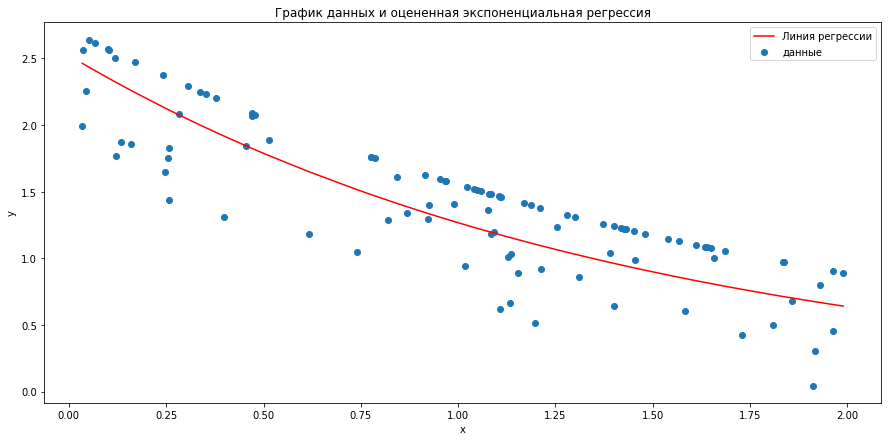

In [ ]:
all_f_exp_reg()

# Примеры регрессий на реальных данных. Данные заказчика






In [ ]:
#данные заказчика
uploaded = files.upload()

Saving Зависимость объёма продаж от затрат на рекламу.csv to Зависимость объёма продаж от затрат на рекламу (11).csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['Зависимость объёма продаж от затрат на рекламу.csv']),sep=';',header=None)

In [ ]:
df1.head()

,0,1
0,12.6,4.0
1,13.7,4.8
2,14.8,3.8
3,19.1,8.7
4,27.4,8.2


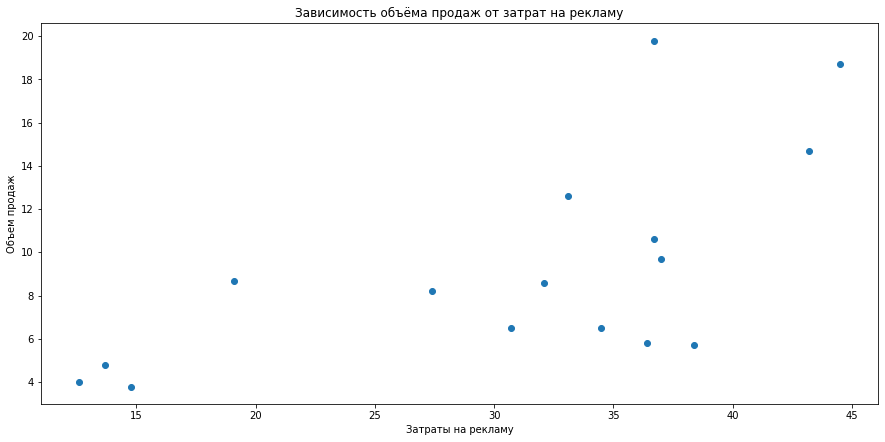

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(df1[0],df1[1])
plt.title('Зависимость объёма продаж от затрат на рекламу')
plt.xlabel('Затраты на рекламу')
plt.ylabel('Объем продаж')
plt.show()

In [ ]:
X=df1[0].values
Y=df1[1].values
X_= np.hstack([np.array([1]*len(X)).reshape(len(X),1), X.reshape(len(X),1)])
X_sort=X_[X_[:, 1].argsort()]
Xsort=X[X.argsort()]

In [ ]:
X_2=np.hstack([X_, X.reshape(len(X),1)**2])
X_sort_2=X_2[X_2[:, 1].argsort()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


[ 7.75994933 -0.36949017  0.01236881]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


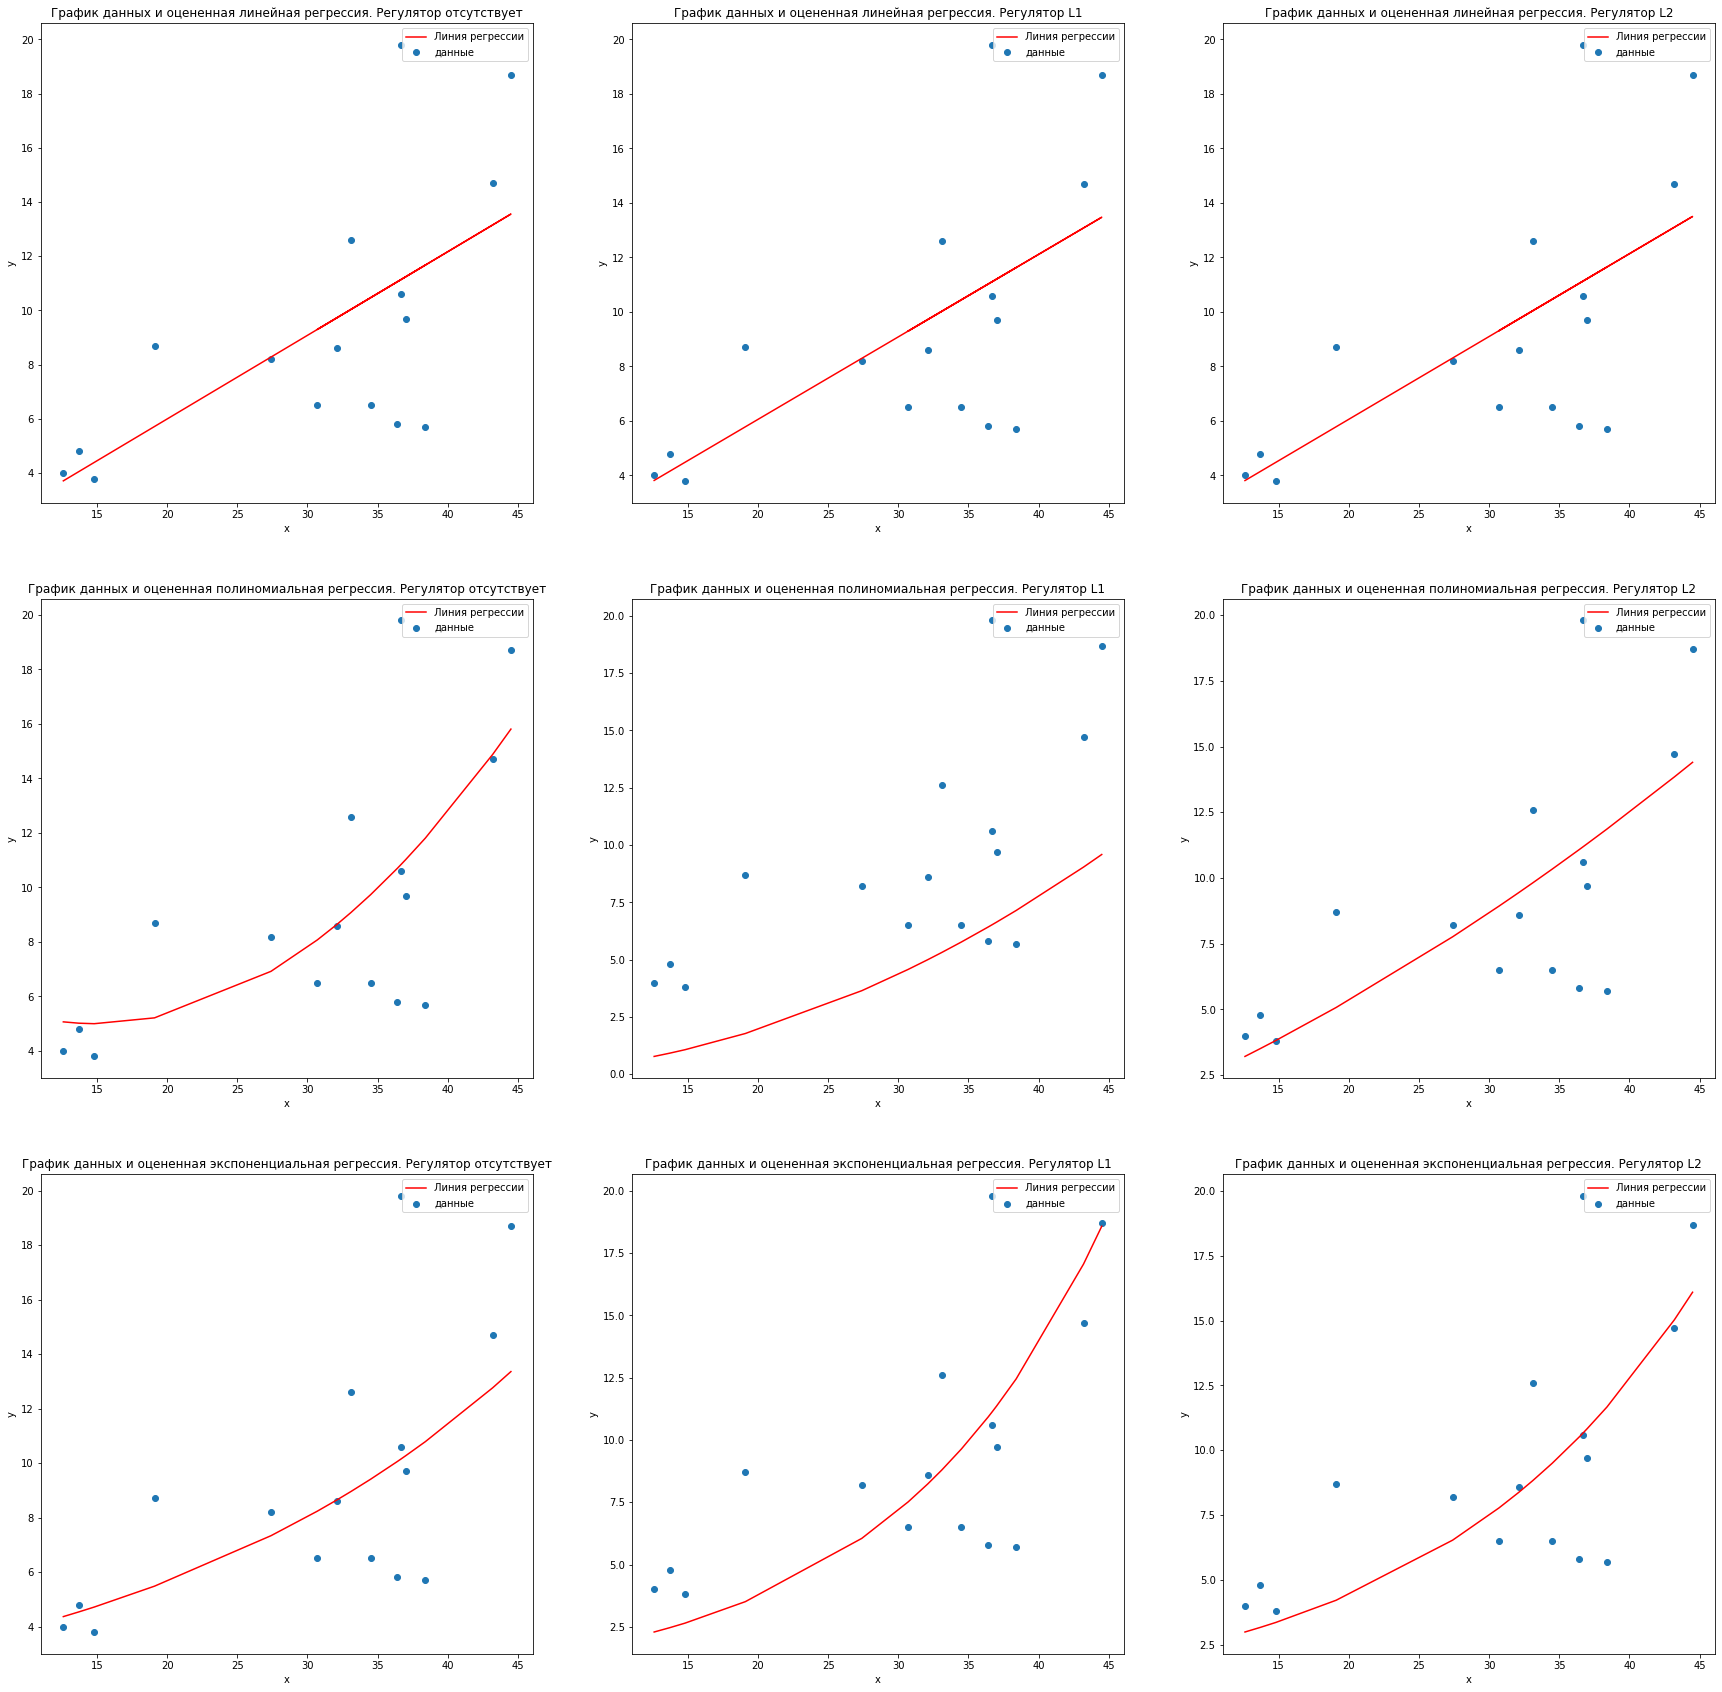

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(3, 3, 1)
a=coef_lin_reg(X_, Y, reg=0)
plt.scatter(X,Y,label='данные')
plt.plot(X,predict(X_,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная линейная регрессия. Регулятор отсутствует')
data=pd.DataFrame([['Линейная','Без регулятора',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])

plt.subplot(3, 3, 2)
a=coef_lin_reg(X_, Y, reg=1)
plt.scatter(X,Y,label='данные')
plt.plot(X,predict(X_,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная линейная регрессия. Регулятор L1')
data1=pd.DataFrame([['Линейная','L1',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 3)
a=coef_lin_reg(X_, Y, reg=2)
plt.scatter(X,Y,label='данные')
plt.plot(X,predict(X_,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная линейная регрессия. Регулятор L2')
data1=pd.DataFrame([['Линейная','L2',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 4)
a=coef_lin_reg(X_2, Y, reg=0)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict(X_sort_2,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная полиномиальная регрессия. Регулятор отсутствует')
data1=pd.DataFrame([['Полиномиальная','Без регулятора',error(X_2,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)
print(a)

plt.subplot(3, 3, 5)
a=coef_lin_reg(X_2, Y, reg=1)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict(X_sort_2,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная полиномиальная регрессия. Регулятор L1')
data1=pd.DataFrame([['Полиномиальная','L1',error(X_2,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 6)
a=coef_lin_reg(X_2, Y, reg=2)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict(X_sort_2,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная полиномиальная регрессия. Регулятор L2')
data1=pd.DataFrame([['Полиномиальная','L2',error(X_2,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 7)
a=coef_lin_reg(X_, np.log(Y), reg=0)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict_exp(X_sort,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная экспоненциальная регрессия. Регулятор отсутствует')
data1=pd.DataFrame([['Экспоненциальная','Без регулятора',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 8)
a=coef_lin_reg(X_, np.log(Y), reg=1)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict_exp(X_sort,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная экспоненциальная регрессия. Регулятор L1')
data1=pd.DataFrame([['Экспоненциальная','L1',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 9)
a=coef_lin_reg(X_, np.log(Y), reg=2)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict_exp(X_sort,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная экспоненциальная регрессия. Регулятор L2')
data1=pd.DataFrame([['Экспоненциальная','L2',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.show()

In [ ]:
data

,Регрессия,Регулятор,Стандартная ошибка
0,Линейная,Без регулятора,6.593705
1,Линейная,L1,6.595355
2,Линейная,L2,6.594862
3,Полиномиальная,Без регулятора,6.037400
4,Полиномиальная,L1,15.357507
5,Полиномиальная,L2,6.462850
6,Экспоненциальная,Без регулятора,36.123360
7,Экспоненциальная,L1,36.006096
8,Экспоненциальная,L2,36.073482


# Примеры регрессий на реальных данных + точность предсказаний

In [ ]:
uploaded = files.upload()

Saving Индекс реальной зарплаты.csv to Индекс реальной зарплаты (1).csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['Индекс реальной зарплаты.csv']),sep=';',header=None)

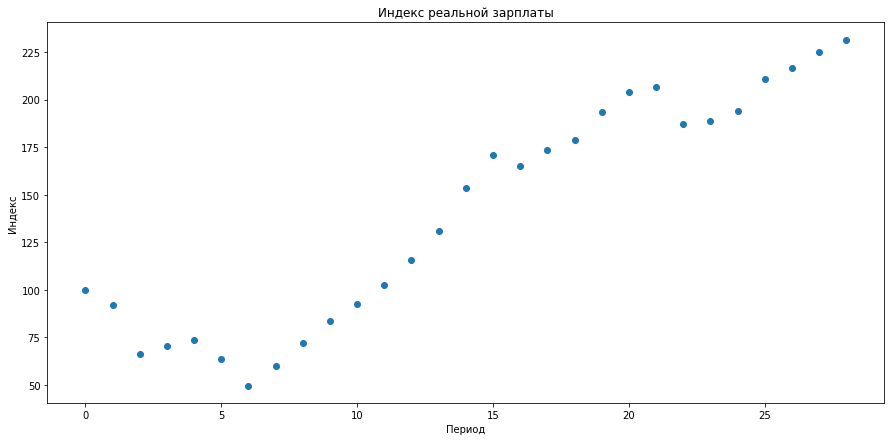

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(df2.index,df2[1])
plt.title('Индекс реальной зарплаты')
plt.xlabel('Период')
plt.ylabel('Индекс')
plt.show()

In [ ]:
X=np.array(list(map(lambda x:x+1,df2[0].index)))
Y=df2[1].values
X_= np.hstack([np.array([1]*len(X)).reshape(len(X),1), X.reshape(len(X),1)])
X_sort=X_[X_[:, 1].argsort()]
Xsort=X[X.argsort()]

In [ ]:
X_2=np.hstack([X_, X.reshape(len(X),1)**2])
X_sort_2=X_2[X_2[:, 1].argsort()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


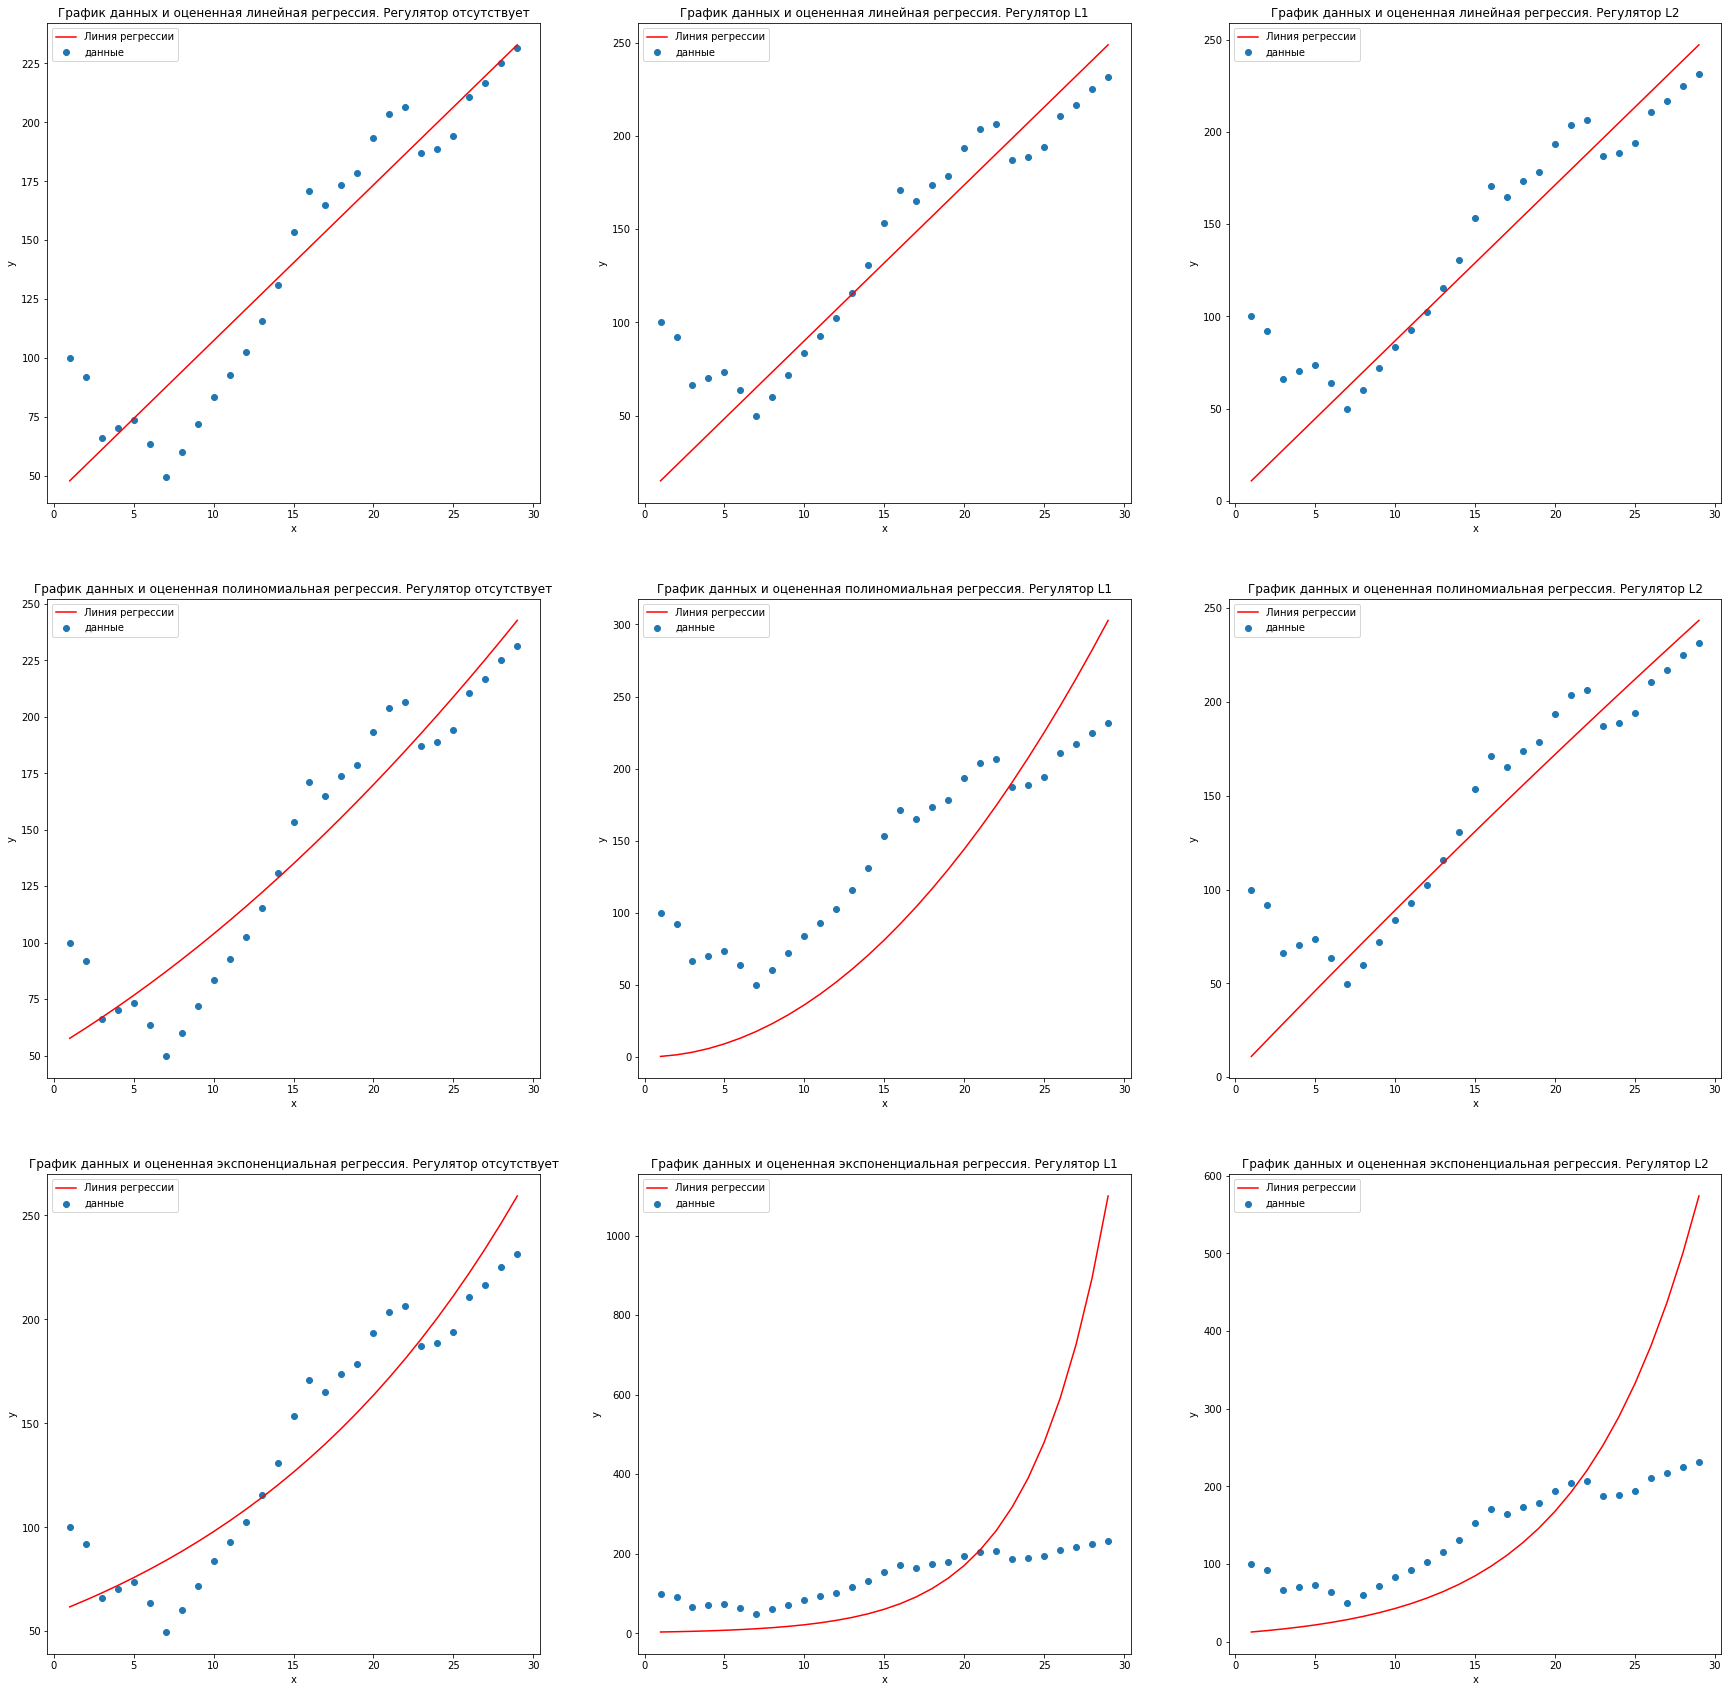

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(3, 3, 1)
a=coef_lin_reg(X_, Y, reg=0)
plt.scatter(X,Y,label='данные')
plt.plot(X,predict(X_,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная линейная регрессия. Регулятор отсутствует')
data=pd.DataFrame([['Линейная','Без регулятора',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])

plt.subplot(3, 3, 2)
a=coef_lin_reg(X_, Y, reg=1)
plt.scatter(X,Y,label='данные')
plt.plot(X,predict(X_,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная линейная регрессия. Регулятор L1')
data1=pd.DataFrame([['Линейная','L1',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 3)
a=coef_lin_reg(X_, Y, reg=2)
plt.scatter(X,Y,label='данные')
plt.plot(X,predict(X_,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная линейная регрессия. Регулятор L2')
data1=pd.DataFrame([['Линейная','L2',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 4)
a=coef_lin_reg(X_2, Y, reg=0)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict(X_sort_2,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная полиномиальная регрессия. Регулятор отсутствует')
data1=pd.DataFrame([['Полиномиальная','Без регулятора',error(X_2,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 5)
a=coef_lin_reg(X_2, Y, reg=1)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict(X_sort_2,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная полиномиальная регрессия. Регулятор L1')
data1=pd.DataFrame([['Полиномиальная','L1',error(X_2,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 6)
a=coef_lin_reg(X_2, Y, reg=2)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict(X_sort_2,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная полиномиальная регрессия. Регулятор L2')
data1=pd.DataFrame([['Полиномиальная','L2',error(X_2,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 7)
a=coef_lin_reg(X_, np.log(Y), reg=0)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict_exp(X_sort,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная экспоненциальная регрессия. Регулятор отсутствует')
data1=pd.DataFrame([['Экспоненциальная','Без регулятора',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 8)
a=coef_lin_reg(X_, np.log(Y), reg=1)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict_exp(X_sort,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная экспоненциальная регрессия. Регулятор L1')
data1=pd.DataFrame([['Экспоненциальная','L1',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.subplot(3, 3, 9)
a=coef_lin_reg(X_, np.log(Y), reg=2)
plt.scatter(X,Y,label='данные')
plt.plot(Xsort,predict_exp(X_sort,np.array(a)),color='red',label='Линия регрессии')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и оцененная экспоненциальная регрессия. Регулятор L2')
data1=pd.DataFrame([['Экспоненциальная','L2',error(X_,Y,a)]],columns=['Регрессия','Регулятор','Стандартная ошибка'])
data=pd.concat([data,data1],ignore_index=True)

plt.show()

In [ ]:
data

,Регрессия,Регулятор,Стандартная ошибка
0,Линейная,Без регулятора,210.985285
1,Линейная,L1,353.134074
2,Линейная,L2,393.867997
3,Полиномиальная,Без регулятора,199.234906
4,Полиномиальная,L1,1550.569062
5,Полиномиальная,L2,375.308839
6,Экспоненциальная,Без регулятора,10905.988679
7,Экспоненциальная,L1,10935.412805
8,Экспоненциальная,L2,10921.340901
